In [1]:
#basic imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/Users/aadityajoshi/Downloads/Combined Data.csv",encoding='utf-8')

In [3]:
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     53043 non-null  object
dtypes: object(2)
memory usage: 828.9+ KB


In [7]:
df.isnull().sum()

statement    362
status         0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
#dropping missing values
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51093 entries, 0 to 52840
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  51093 non-null  object
 1   status     51093 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [11]:
#check for blanks
blanks = []
for i,txt,lbl in df.itertuples():
    if type(txt) == str:
        if txt.isspace() == True:
            blanks.append(i)
blanks

[]

In [35]:
df['len'] = df['statement'].apply(len)

In [13]:
#removing punctuation and stop words
import spacy
nlp = spacy.load('en_core_web_lg')

In [16]:
def clean_text(text):
    doc = nlp(text)
    return ' '.join([token.text.lower() for token in doc if not token.is_punct and not token.is_stop ])

In [17]:
df['text'] = df['statement'].apply(clean_text)

In [18]:
#stemming, lemmatizing
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df['stem_text'] = df['text'].apply(lambda x : stemmer.stem(x))

In [19]:
def lemmatize(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

In [20]:
df['lemm_text'] = df['text'].apply(lemmatize)

In [14]:
df.head()

,statement,status,len
0,oh my gosh,Anxiety,10
1,"trouble sleeping, confused mind, restless hear...",Anxiety,64
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,78
3,I've shifted my focus to something else but I'...,Anxiety,61
4,"I'm restless and restless, it's been a month n...",Anxiety,72


In [158]:
df['len'] = df['lemm_text'].apply(len)

In [41]:
df['len'].sort_values(ascending=False)

9416     25282
46660    13834
10834    12775
51396    11147
13293    10079
         ...  
32810        0
32095        0
31749        0
31755        0
31187        0
Name: len, Length: 51093, dtype: int64

In [21]:
def tokenize(text):
    doc = nlp(text)
    return [token.text for token in doc]
df['tokens'] = df['statement'].apply(tokenize)
df['wrd_len'] = df['tokens'].apply(len)


In [41]:
df['wrd_len'].sort_values(ascending=False)

16425    125
16923    125
37793    125
12646    125
34476    125
        ... 
1854       1
5202       1
4680       1
5971       1
3180       1
Name: wrd_len, Length: 34519, dtype: int64

In [42]:
df = df[df['wrd_len'] <= 125]

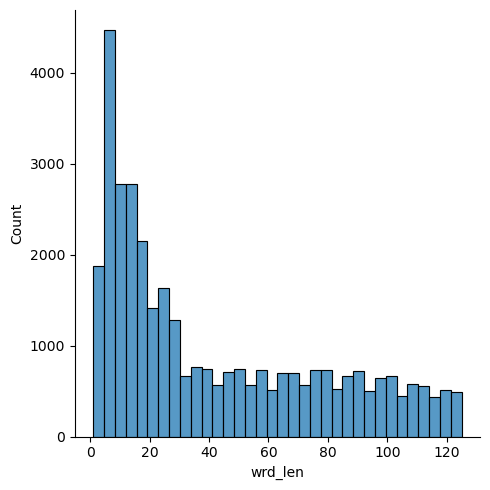

In [43]:
sns.displot(df['wrd_len'])

In [44]:
#creating 3 pipelines
df.head()

,statement,status,len,text,stem_text,lemm_text,tokens,wrd_len
0,oh my gosh,Anxiety,10,oh gosh,oh gosh,oh gosh,"[oh, my, gosh]",3
1,"trouble sleeping, confused mind, restless hear...",Anxiety,64,trouble sleeping confused mind restless heart ...,trouble sleeping confused mind restless heart tun,trouble sleep confuse mind restless heart tune,"[trouble, sleeping, ,, confused, mind, ,, rest...",13
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,78,wrong dear forward doubt stay restless restles...,wrong dear forward doubt stay restless restles...,wrong dear forward doubt stay restless restles...,"[All, wrong, ,, back, off, dear, ,, forward, d...",17
3,I've shifted my focus to something else but I'...,Anxiety,61,shifted focus worried,shifted focus worri,shift focus worry,"[I, 've, shifted, my, focus, to, something, el...",13
4,"I'm restless and restless, it's been a month n...",Anxiety,72,restless restless month boy mean,restless restless month boy mean,restless restless month boy mean,"[I, 'm, restless, and, restless, ,, it, 's, be...",20


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34519 entries, 0 to 52840
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  34519 non-null  object
 1   status     34519 non-null  object
 2   len        34519 non-null  int64 
 3   text       34519 non-null  object
 4   stem_text  34519 non-null  object
 5   lemm_text  34519 non-null  object
 6   tokens     34519 non-null  object
 7   wrd_len    34519 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 3.4+ MB


<Axes: xlabel='status', ylabel='count'>

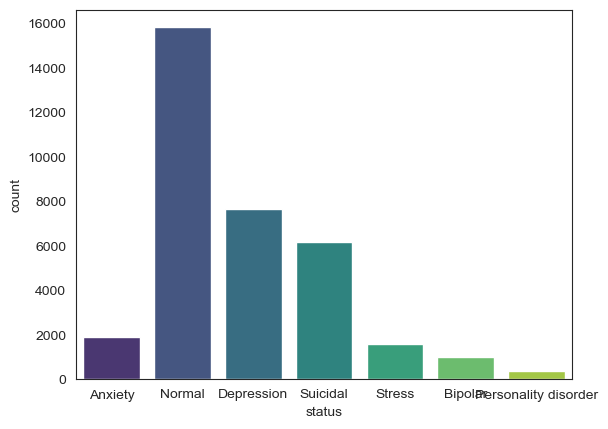

In [66]:
sns.set_style('white')
sns.countplot(x='status',data=df,palette='viridis')

In [90]:
df['status'].value_counts()

status
Normal                  15836
Depression               7652
Suicidal                 6176
Anxiety                  1900
Stress                   1569
Bipolar                  1009
Personality disorder      377
Name: count, dtype: int64

In [ ]:
#we will be dividing all classes into 3 bins
"""Normal: Doesn't need help (15,836 samples)
Depression/Suicidal: Needs help with depression and suicide risk (13,828 samples)
Other: Needs other kinds of assistance (4,855 samples)

This grouping makes sense because:

It maintains a clear distinction between those who likely don't need intervention and those who do.
It prioritizes depression and suicide, which often co-occur and represent high-risk conditions requiring immediate attention.
It groups other conditions that, while serious, might require different types of interventions."""

In [110]:
def bin_3(label):
    if label == "Normal":
        return label
    elif label == "Depression" or label == "Suicidal":
        return "Depression + Suicidal"
    else:
        return "Other"

In [111]:
df['status'].apply(bin_3).value_counts()

status
Normal                   15836
Depression + Suicidal    13828
Other                     4855
Name: count, dtype: int64

In [112]:
df['status'] = df['status'].apply(bin_3)

In [113]:
df['status'].value_counts()

status
Normal                   15836
Depression + Suicidal    13828
Other                     4855
Name: count, dtype: int64

In [128]:
text_raw = df['text']
text_stem = df['stem_text']
text_lemm = df['lemm_text']
label = df['status']

In [129]:
#train and test split
from sklearn.model_selection import train_test_split
text_raw_train,text_raw_test,label_train,label_test = train_test_split(text_raw,label,test_size=0.2,stratify=label)

In [130]:
text_stem_train,text_stem_test,label_train,label_test = train_test_split(text_stem,label,test_size=0.2,stratify=label)

In [131]:
text_lemm_train,text_lemm_test,label_train,label_test = train_test_split(text_lemm,label,test_size=0.2,stratify=label)

### countvect only and countvect + tfidf with 4 models each

In [119]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,roc_auc_score,accuracy_score,f1_score

### Dtree pipelines + Bow

In [120]:
bow_dtree_raw = Pipeline([("bow",CountVectorizer()),
                          ("dtree",DecisionTreeClassifier())])
bow_dtree_stem = Pipeline([("bow",CountVectorizer()),
                          ("dtree",DecisionTreeClassifier())])
bow_dtree_lemm = Pipeline([("bow",CountVectorizer()),
                          ("dtree",DecisionTreeClassifier())])

In [121]:
bow_dtree_raw.fit(text_raw_train,label_train)
pred_bow_dtree_raw = bow_dtree_raw.predict(text_raw_test)
print("Decision Tree + BOW - Raw Text")
print(classification_report(label_test,pred_bow_dtree_raw))

Decision Tree + BOW - Raw Text
                       precision    recall  f1-score   support

Depression + Suicidal       0.40      0.44      0.42      2766
               Normal       0.45      0.45      0.45      3167
                Other       0.16      0.12      0.13       971

             accuracy                           0.40      6904
            macro avg       0.34      0.34      0.33      6904
         weighted avg       0.39      0.40      0.39      6904



In [122]:
bow_dtree_stem.fit(text_stem_train,label_train)
pred_bow_dtree_stem = bow_dtree_stem.predict(text_stem_test)
print("Decision Tree + BOW -Stem Text")
print(classification_report(label_test,pred_bow_dtree_stem))

Decision Tree + BOW -Stem Text
                       precision    recall  f1-score   support

Depression + Suicidal       0.40      0.42      0.41      2766
               Normal       0.45      0.48      0.47      3167
                Other       0.14      0.09      0.11       971

             accuracy                           0.40      6904
            macro avg       0.33      0.33      0.33      6904
         weighted avg       0.39      0.40      0.39      6904



In [155]:
bow_dtree_lemm.fit(text_lemm_train,label_train)
pred_bow_dtree_lemm = bow_dtree_lemm.predict(text_lemm_test)
print("Decision Tree + BOW -Lemm Text")
print(classification_report(label_test,pred_bow_dtree_lemm))

Decision Tree + BOW -Lemm Text
                       precision    recall  f1-score   support

Depression + Suicidal       0.77      0.78      0.78      2766
               Normal       0.84      0.87      0.86      3167
                Other       0.59      0.51      0.54       971

             accuracy                           0.78      6904
            macro avg       0.74      0.72      0.73      6904
         weighted avg       0.78      0.78      0.78      6904



### RFC pipelines + Bow

In [124]:
bow_rfc_raw = Pipeline([("bow",CountVectorizer()),
                          ("RFC",RandomForestClassifier())])
bow_rfc_stem = Pipeline([("bow",CountVectorizer()),
                          ("RFC",RandomForestClassifier())])
bow_rfc_lemm = Pipeline([("bow",CountVectorizer()),
                          ("RFC",RandomForestClassifier())])

In [132]:
bow_rfc_raw.fit(text_raw_train,label_train)
pred_bow_rfc_raw = bow_rfc_raw.predict(text_raw_test)
print("RFC + BOW - Raw Text")
print(classification_report(label_test,pred_bow_rfc_raw))

RFC + BOW - Raw Text
                       precision    recall  f1-score   support

Depression + Suicidal       0.39      0.36      0.38      2766
               Normal       0.45      0.59      0.51      3167
                Other       0.11      0.02      0.03       971

             accuracy                           0.42      6904
            macro avg       0.32      0.32      0.31      6904
         weighted avg       0.38      0.42      0.39      6904



In [133]:
bow_rfc_stem.fit(text_stem_train,label_train)
pred_bow_rfc_stem = bow_rfc_stem.predict(text_stem_test)
print("RFC + BOW - STEM Text")
print(classification_report(label_test,pred_bow_rfc_stem))

RFC + BOW - STEM Text
                       precision    recall  f1-score   support

Depression + Suicidal       0.41      0.37      0.39      2766
               Normal       0.46      0.62      0.53      3167
                Other       0.11      0.02      0.03       971

             accuracy                           0.43      6904
            macro avg       0.33      0.34      0.32      6904
         weighted avg       0.39      0.43      0.40      6904



In [127]:
bow_rfc_lemm.fit(text_lemm_train,label_train)
pred_bow_rfc_lemm = bow_rfc_lemm.predict(text_lemm_test)
print("RFC + BOW - LEMM Text")
print(classification_report(label_test,pred_bow_rfc_lemm))

RFC + BOW - STEM Text
                       precision    recall  f1-score   support

Depression + Suicidal       0.76      0.90      0.82      2766
               Normal       0.88      0.91      0.90      3167
                Other       0.90      0.32      0.47       971

             accuracy                           0.82      6904
            macro avg       0.84      0.71      0.73      6904
         weighted avg       0.83      0.82      0.81      6904



### SVM + BOW pipeline

In [134]:
bow_svm_raw = Pipeline([("bow",CountVectorizer()),
                          ("svm",SVC())])
bow_svm_stem = Pipeline([("bow",CountVectorizer()),
                          ("svm",SVC())])
bow_svm_lemm = Pipeline([("bow",CountVectorizer()),
                          ("svm",SVC())])

In [135]:
bow_svm_raw.fit(text_raw_train,label_train)
pred_bow_svm_raw = bow_svm_raw.predict(text_raw_test)
print("SVM + BOW - Raw Text")
print(classification_report(label_test,pred_bow_svm_raw))

SVM + BOW - Raw Text
                       precision    recall  f1-score   support

Depression + Suicidal       0.37      0.15      0.21      2766
               Normal       0.45      0.83      0.59      3167
                Other       0.00      0.00      0.00       971

             accuracy                           0.44      6904
            macro avg       0.28      0.33      0.27      6904
         weighted avg       0.36      0.44      0.36      6904



In [136]:
bow_svm_stem.fit(text_stem_train,label_train)
pred_bow_svm_stem = bow_svm_stem.predict(text_stem_test)
print("SVM + BOW - STEM Text")
print(classification_report(label_test,pred_bow_svm_stem))

SVM + BOW - STEM Text
                       precision    recall  f1-score   support

Depression + Suicidal       0.39      0.15      0.21      2766
               Normal       0.46      0.85      0.60      3167
                Other       0.00      0.00      0.00       971

             accuracy                           0.45      6904
            macro avg       0.28      0.33      0.27      6904
         weighted avg       0.37      0.45      0.36      6904



In [137]:
bow_svm_lemm.fit(text_lemm_train,label_train)
pred_bow_svm_lemm = bow_svm_lemm.predict(text_lemm_test)
print("SVM + BOW - LEMM Text")
print(classification_report(label_test,pred_bow_svm_lemm))

SVM + BOW - LEMM Text
                       precision    recall  f1-score   support

Depression + Suicidal       0.83      0.90      0.86      2766
               Normal       0.91      0.92      0.92      3167
                Other       0.80      0.58      0.67       971

             accuracy                           0.86      6904
            macro avg       0.85      0.80      0.82      6904
         weighted avg       0.86      0.86      0.86      6904



### NB+BOW pipeline

In [138]:
bow_nb_raw = Pipeline([("bow",CountVectorizer()),
                          ("nb",MultinomialNB())])
bow_nb_stem = Pipeline([("bow",CountVectorizer()),
                          ("nb",MultinomialNB())])
bow_nb_lemm = Pipeline([("bow",CountVectorizer()),
                          ("nb",MultinomialNB())])

In [140]:
bow_nb_raw.fit(text_raw_train,label_train)
pred_bow_nb_raw = bow_nb_raw.predict(text_raw_test)
print("NB + BOW - Raw Text")
print(classification_report(label_test,pred_bow_nb_raw))

NB + BOW - Raw Text
                       precision    recall  f1-score   support

Depression + Suicidal       0.39      0.32      0.35      2766
               Normal       0.45      0.64      0.53      3167
                Other       0.19      0.02      0.04       971

             accuracy                           0.43      6904
            macro avg       0.34      0.33      0.31      6904
         weighted avg       0.39      0.43      0.39      6904



In [141]:
bow_nb_stem.fit(text_stem_train,label_train)
pred_bow_nb_stem = bow_nb_stem.predict(text_stem_test)
print("NB + BOW - STEM Text")
print(classification_report(label_test,pred_bow_nb_stem))

NB + BOW - STEM Text
                       precision    recall  f1-score   support

Depression + Suicidal       0.39      0.32      0.35      2766
               Normal       0.46      0.65      0.54      3167
                Other       0.11      0.01      0.02       971

             accuracy                           0.43      6904
            macro avg       0.32      0.33      0.30      6904
         weighted avg       0.38      0.43      0.39      6904



In [142]:
bow_nb_lemm.fit(text_lemm_train,label_train)
pred_bow_nb_lemm = bow_nb_lemm.predict(text_lemm_test)
print("NB + BOW - LEMM Text")
print(classification_report(label_test,pred_bow_nb_lemm))

NB + BOW - LEMM Text
                       precision    recall  f1-score   support

Depression + Suicidal       0.71      0.93      0.81      2766
               Normal       0.95      0.74      0.83      3167
                Other       0.72      0.62      0.67       971

             accuracy                           0.80      6904
            macro avg       0.80      0.76      0.77      6904
         weighted avg       0.82      0.80      0.80      6904



### Best Accuracy - SVM+LEMM (86%),RFC+LEMM(82%)

### Dtree pipelines + Bow +Tfidf

In [143]:
bow_tfidf_dtree_raw = Pipeline([("bow+tfidf",TfidfVectorizer()),
                          ("dtree",DecisionTreeClassifier())])
bow_tfidf_dtree_stem = Pipeline([("bow+tfidf",TfidfVectorizer()),
                          ("dtree",DecisionTreeClassifier())])
bow_tfidf_dtree_lemm = Pipeline([("bow+tfidf",TfidfVectorizer()),
                          ("dtree",DecisionTreeClassifier())])

In [144]:
bow_tfidf_dtree_raw.fit(text_raw_train,label_train)
pred_bow_tfidf_dtree_raw = bow_tfidf_dtree_raw.predict(text_raw_test)
print("Dtree + BOW + Tfidf - Raw Text")
print(classification_report(label_test,pred_bow_tfidf_dtree_raw))

Dtree + BOW + Tfidf - Raw Text
                       precision    recall  f1-score   support

Depression + Suicidal       0.39      0.40      0.39      2766
               Normal       0.46      0.51      0.48      3167
                Other       0.13      0.08      0.10       971

             accuracy                           0.40      6904
            macro avg       0.33      0.33      0.33      6904
         weighted avg       0.39      0.40      0.39      6904



In [145]:
bow_tfidf_dtree_stem.fit(text_stem_train,label_train)
pred_bow_tfidf_dtree_stem = bow_tfidf_dtree_stem.predict(text_stem_test)
print("Dtree + BOW + Tfidf - STEM Text")
print(classification_report(label_test,pred_bow_tfidf_dtree_stem))

Dtree + BOW + Tfidf - STEM Text
                       precision    recall  f1-score   support

Depression + Suicidal       0.39      0.40      0.39      2766
               Normal       0.45      0.50      0.47      3167
                Other       0.15      0.10      0.12       971

             accuracy                           0.40      6904
            macro avg       0.33      0.33      0.33      6904
         weighted avg       0.38      0.40      0.39      6904



In [150]:
bow_tfidf_dtree_lemm.fit(text_lemm_train,label_train)
pred_bow_tfidf_dtree_lemm = bow_tfidf_dtree_lemm.predict(text_lemm_test)
print("Dtree + BOW + Tfidf - LEMM Text")
print(classification_report(label_test,pred_bow_tfidf_dtree_lemm))

Dtree + BOW + Tfidf - LEMM Text
                       precision    recall  f1-score   support

Depression + Suicidal       0.78      0.77      0.77      2766
               Normal       0.84      0.87      0.85      3167
                Other       0.57      0.54      0.56       971

             accuracy                           0.78      6904
            macro avg       0.73      0.73      0.73      6904
         weighted avg       0.78      0.78      0.78      6904



### RFC + BOW +Tfidf pipelines

In [147]:
bow_tfidf_rfc_raw = Pipeline([("bow+tfidf",TfidfVectorizer()),
                          ("RFC",RandomForestClassifier())])
bow_tfidf_rfc_stem = Pipeline([("bow+tfidf",TfidfVectorizer()),
                          ("RFC",RandomForestClassifier())])
bow_tfidf_rfc_lemm = Pipeline([("bow+tfidf",TfidfVectorizer()),
                          ("RFC",RandomForestClassifier())])

In [148]:
bow_tfidf_rfc_raw.fit(text_raw_train,label_train)
pred_bow_tfidf_rfc_raw = bow_tfidf_rfc_raw.predict(text_raw_test)
print("RFC + BOW + Tfidf - Raw Text")
print(classification_report(label_test,pred_bow_tfidf_rfc_raw))

RFC + BOW + Tfidf - Raw Text
                       precision    recall  f1-score   support

Depression + Suicidal       0.40      0.33      0.36      2766
               Normal       0.46      0.66      0.54      3167
                Other       0.13      0.01      0.02       971

             accuracy                           0.43      6904
            macro avg       0.33      0.33      0.31      6904
         weighted avg       0.39      0.43      0.40      6904



In [149]:
bow_tfidf_rfc_stem.fit(text_stem_train,label_train)
pred_bow_tfidf_rfc_stem = bow_tfidf_rfc_stem.predict(text_stem_test)
print("RFC + BOW + Tfidf - STEM Text")
print(classification_report(label_test,pred_bow_tfidf_rfc_stem))

RFC + BOW + Tfidf - STEM Text
                       precision    recall  f1-score   support

Depression + Suicidal       0.40      0.33      0.36      2766
               Normal       0.46      0.67      0.55      3167
                Other       0.20      0.02      0.03       971

             accuracy                           0.44      6904
            macro avg       0.35      0.34      0.31      6904
         weighted avg       0.40      0.44      0.40      6904



In [152]:
bow_tfidf_rfc_lemm.fit(text_lemm_train,label_train)
pred_bow_tfidf_rfc_lemm = bow_tfidf_rfc_lemm.predict(text_lemm_test)
print("rfc + BOW + Tfidf - LEMM Text")
print(classification_report(label_test,pred_bow_tfidf_rfc_lemm))

rfc + BOW + Tfidf - LEMM Text
                       precision    recall  f1-score   support

Depression + Suicidal       0.76      0.91      0.83      2766
               Normal       0.90      0.92      0.91      3167
                Other       0.88      0.34      0.49       971

             accuracy                           0.83      6904
            macro avg       0.85      0.72      0.74      6904
         weighted avg       0.84      0.83      0.82      6904



### SVM + BOW +Tfidf pipelines 

In [153]:
bow_tfidf_svm_raw = Pipeline([("bow+tfidf",TfidfVectorizer()),
                          ("SVM",SVC())])
bow_tfidf_svm_stem = Pipeline([("bow+tfidf",TfidfVectorizer()),
                          ("SVM",SVC())])
bow_tfidf_svm_lemm = Pipeline([("bow+tfidf",TfidfVectorizer()),
                          ("SVM",SVC())])

In [154]:
bow_tfidf_svm_raw.fit(text_raw_train,label_train)
pred_bow_tfidf_svm_raw = bow_tfidf_svm_raw.predict(text_raw_test)
print("SVM + BOW + Tfidf - Raw Text")
print(classification_report(label_test,pred_bow_tfidf_svm_raw))

SVM + BOW + Tfidf - Raw Text
                       precision    recall  f1-score   support

Depression + Suicidal       0.39      0.28      0.32      2766
               Normal       0.46      0.71      0.56      3167
                Other       0.00      0.00      0.00       971

             accuracy                           0.44      6904
            macro avg       0.28      0.33      0.29      6904
         weighted avg       0.37      0.44      0.39      6904



In [156]:
bow_tfidf_svm_stem.fit(text_stem_train,label_train)
pred_bow_tfidf_svm_stem = bow_tfidf_svm_stem.predict(text_stem_test)
print("SVM + BOW + Tfidf - STEM Text")
print(classification_report(label_test,pred_bow_tfidf_svm_stem))

SVM + BOW + Tfidf - STEM Text
                       precision    recall  f1-score   support

Depression + Suicidal       0.38      0.26      0.31      2766
               Normal       0.46      0.72      0.56      3167
                Other       0.00      0.00      0.00       971

             accuracy                           0.44      6904
            macro avg       0.28      0.33      0.29      6904
         weighted avg       0.36      0.44      0.38      6904



In [157]:
bow_tfidf_svm_lemm.fit(text_lemm_train,label_train)
pred_bow_tfidf_svm_lemm = bow_tfidf_svm_lemm.predict(text_lemm_test)
print("svm + BOW + Tfidf - LEMM Text")
print(classification_report(label_test,pred_bow_tfidf_svm_lemm))

svm + BOW + Tfidf - LEMM Text
                       precision    recall  f1-score   support

Depression + Suicidal       0.86      0.89      0.87      2766
               Normal       0.90      0.93      0.91      3167
                Other       0.82      0.60      0.69       971

             accuracy                           0.87      6904
            macro avg       0.86      0.81      0.83      6904
         weighted avg       0.87      0.87      0.87      6904



In [159]:
bow_tfidf_nb_raw = Pipeline([("bow+tfidf",TfidfVectorizer()),
                          ("nb",MultinomialNB())])
bow_tfidf_nb_stem = Pipeline([("bow+tfidf",TfidfVectorizer()),
                          ("nb",MultinomialNB())])
bow_tfidf_nb_lemm = Pipeline([("bow+tfidf",TfidfVectorizer()),
                          ("nb",MultinomialNB())])

In [160]:
bow_tfidf_nb_raw.fit(text_raw_train,label_train)
pred_bow_tfidf_nb_raw = bow_tfidf_nb_raw.predict(text_raw_test)
print("NB + BOW + Tfidf - Raw Text")
print(classification_report(label_test,pred_bow_tfidf_nb_raw))

NB + BOW + Tfidf - Raw Text
                       precision    recall  f1-score   support

Depression + Suicidal       0.38      0.16      0.23      2766
               Normal       0.45      0.82      0.59      3167
                Other       0.00      0.00      0.00       971

             accuracy                           0.44      6904
            macro avg       0.28      0.33      0.27      6904
         weighted avg       0.36      0.44      0.36      6904



In [161]:
bow_tfidf_nb_stem.fit(text_stem_train,label_train)
pred_bow_tfidf_nb_stem = bow_tfidf_nb_stem.predict(text_stem_test)
print("NB + BOW + Tfidf - STEM Text")
print(classification_report(label_test,pred_bow_tfidf_nb_stem))

NB + BOW + Tfidf - STEM Text
                       precision    recall  f1-score   support

Depression + Suicidal       0.37      0.17      0.23      2766
               Normal       0.45      0.81      0.58      3167
                Other       1.00      0.00      0.00       971

             accuracy                           0.44      6904
            macro avg       0.61      0.33      0.27      6904
         weighted avg       0.50      0.44      0.36      6904



In [162]:
bow_tfidf_nb_lemm.fit(text_lemm_train,label_train)
pred_bow_tfidf_nb_lemm = bow_tfidf_nb_lemm.predict(text_lemm_test)
print("NB + BOW + Tfidf - LEMM Text")
print(classification_report(label_test,pred_bow_tfidf_nb_lemm))

NB + BOW + Tfidf - LEMM Text
                       precision    recall  f1-score   support

Depression + Suicidal       0.64      0.97      0.77      2766
               Normal       0.93      0.74      0.82      3167
                Other       0.93      0.17      0.28       971

             accuracy                           0.75      6904
            macro avg       0.83      0.62      0.62      6904
         weighted avg       0.81      0.75      0.73      6904



### Best accuracy SVM+BoW+tfidf - 87%

### Vectorizing Text

In [170]:
def vectorize(text):
    doc = nlp(text)
    return doc.vector

In [ ]:
#use this for now, forgot to add vect
text_raw = df['text'].apply(vectorize)
text_stem = df['stem_text'].apply(vectorize)
text_lemm = df['lemm_text'].apply(vectorize)

In [177]:
label = df['status']
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
label_en = lbl.fit_transform(df['status'])
from tensorflow.keras.utils import to_categorical
label_en = to_categorical(label_en,num_classes =3)

In [181]:
text_raw_train_vect,text_raw_test_vect,label_train_en,label_test_en = train_test_split(text_raw,label_en,test_size=0.2,stratify=label)

In [182]:
text_stem_train_vect,text_stem_test_vect,_,_ = train_test_split(text_stem,label_en,test_size=0.2,stratify=label)

In [183]:
text_lemm_train_vect,text_lemm_test_vect,_,_ = train_test_split(text_lemm,label_en,test_size=0.2,stratify=label)

In [184]:
text_raw_train_vect = np.array(text_raw_train_vect.tolist())
text_raw_test_vect = np.array(text_raw_test_vect.tolist())
text_stem_train_vect = np.array(text_stem_train_vect.tolist())
text_stem_test_vect = np.array(text_stem_test_vect.tolist())
text_lemm_train_vect = np.array(text_lemm_train_vect.tolist())
text_lemm_test_vect = np.array(text_lemm_test_vect.tolist())

In [185]:
text_raw_train_vect

array([[ 1.1360738 ,  2.1963723 , -2.441451  , ...,  0.16634843,
        -1.3382624 ,  1.059014  ],
       [-0.04329304,  0.4880501 , -2.5585122 , ...,  1.5938971 ,
        -3.1678433 ,  2.2137842 ],
       [-0.6871018 ,  0.89500815, -1.0987227 , ...,  0.16608816,
        -1.2401965 ,  0.43304366],
       ...,
       [ 0.43235362, -0.11997981, -0.81152797, ...,  0.2651369 ,
        -2.7310343 ,  0.7777474 ],
       [ 0.29954374,  0.93336254, -1.622493  , ...,  0.76761806,
        -1.0794976 ,  0.16948687],
       [ 2.2735848 ,  0.70357543, -2.344398  , ..., -1.3723776 ,
        -4.410455  ,  0.93325996]], dtype=float32)

In [186]:
print("Raw text train shape:", text_raw_train_vect.shape)
print("Raw text test shape:", text_raw_test_vect.shape)
print("Stem text train shape:", text_stem_train_vect.shape)
print("Stem text test shape:", text_stem_test_vect.shape)
print("Lemm text train shape:", text_lemm_train_vect.shape)
print("Lemm text test shape:", text_lemm_test_vect.shape)
print("Labels train shape:", label_train_en.shape)
print("Labels test shape:", label_test_en.shape)

Raw text train shape: (27615, 300)
Raw text test shape: (6904, 300)
Stem text train shape: (27615, 300)
Stem text test shape: (6904, 300)
Lemm text train shape: (27615, 300)
Lemm text test shape: (6904, 300)
Labels train shape: (27615, 3)
Labels test shape: (6904, 3)


### Creating NN for Word2vec

In [187]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [232]:
def create_NN():
    #define model
    model = Sequential()
    #data shape = (-1,300) first layer -> 300
    model.add(Dense(1200,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(600,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(300,activation='relu'))
    model.add(Dropout(0.2))
    #2nd ->150
    model.add(Dense(150,activation='relu'))
    model.add(Dropout(0.2))
    #3rd - >75
    model.add(Dense(75,activation='relu'))
    model.add(Dropout(0.2))
    #4th-> 37
    model.add(Dense(37,activation='relu'))
    model.add(Dropout(0.2))
    # 5th -> 18
    model.add(Dense(18,activation='relu'))
    model.add(Dropout(0.2))
    #6th -> 9
    model.add(Dense(9,activation='relu'))
    model.add(Dropout(0.2))
    #output layer
    model.add(Dense(3,activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model
    

### Raw text model

In [195]:
from tensorflow.keras.backend import clear_session
clear_session()
raw_text_model = create_NN()

In [196]:
raw_text_model.fit(text_raw_train_vect,label_train_en,epochs=50)

Epoch 1/50


2024-07-30 21:50:04.898359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


863/863 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.6304 - loss: 0.8566
Epoch 2/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.7593 - loss: 0.6226
Epoch 3/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.7833 - loss: 0.5744
Epoch 4/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.7962 - loss: 0.5368
Epoch 5/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8092 - loss: 0.5101
Epoch 6/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8165 - loss: 0.4944
Epoch 7/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8297 - loss: 0.4660
Epoch 8/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8266 - loss: 0.4558
Epoch 9/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8352 - loss: 0.4431
Epoch 10/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8365 - loss: 0.4356
Epoch 11/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8377 - loss: 0.4305
Epoch 12/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 

In [217]:
prediction = model.predict(text_raw_test_vect)

216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [218]:
y_pred = np.argmax(prediction, axis=1)
y_true = np.argmax(label_test_en, axis=1)

In [221]:

report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.12      0.01      0.01      2766
           1       0.44      0.91      0.59      3167
           2       0.07      0.02      0.03       971

    accuracy                           0.42      6904
   macro avg       0.21      0.31      0.21      6904
weighted avg       0.26      0.42      0.28      6904



### Stem text model

In [225]:
stem_text_model = create_NN()

In [226]:
import tensorflow as tf
tf.debugging.set_log_device_placement(True)
with tf.device('/GPU:0'):    
    stem_text_model.fit(text_stem_train_vect,label_train_en,epochs=100)

Epoch 1/100
863/863 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.4325 - loss: 1.0440
Epoch 2/100
863/863 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.4558 - loss: 1.0095
Epoch 3/100
863/863 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.4576 - loss: 1.0042
Epoch 4/100
863/863 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.4618 - loss: 1.0003
Epoch 5/100
863/863 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.4557 - loss: 1.0013
Epoch 6/100
863/863 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.4628 - loss: 0.9987
Epoch 7/100
863/863 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.4582 - loss: 1.0037
Epoch 8/100
863/863 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.4613 - loss: 1.0007
Epoch 9/100
863/863 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.4583 - loss: 0.9985
Epoch 10/100
863/863 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.4564 - loss: 1.0045
Epoch 11/100
863/863 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.4624 - loss: 0.9970
Epoch 12/100
863/86

863/863 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.4631 - loss: 1.0017
Epoch 68/100
863/863 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.4574 - loss: 0.9997
Epoch 69/100
863/863 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.4613 - loss: 0.9976
Epoch 70/100
863/863 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.4556 - loss: 1.0012
Epoch 71/100
863/863 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.4656 - loss: 0.9974
Epoch 72/100
863/863 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.4583 - loss: 1.0021
Epoch 73/100
863/863 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.4587 - loss: 1.0039
Epoch 74/100
863/863 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.4596 - loss: 0.9994
Epoch 75/100
863/863 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.4625 - loss: 0.9964
Epoch 76/100
863/863 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.4591 - loss: 1.0010
Epoch 77/100
863/863 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.4575 - loss: 0.9997
Epoch 78/100
863/863 ━━

### Lemm text

In [233]:
from tensorflow.keras.backend import clear_session
clear_session()
lemm_text_model = create_NN()

In [234]:
import tensorflow as tf
tf.debugging.set_log_device_placement(True)
with tf.device('/GPU:0'):    
    lemm_text_model.fit(text_lemm_train_vect,label_train_en,epochs=50)

Epoch 1/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 51s 58ms/step - accuracy: 0.4215 - loss: 1.0693
Epoch 2/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 49s 56ms/step - accuracy: 0.4508 - loss: 1.0027
Epoch 3/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 49s 57ms/step - accuracy: 0.4544 - loss: 1.0072
Epoch 4/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 51s 59ms/step - accuracy: 0.4557 - loss: 1.0006
Epoch 5/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 50s 58ms/step - accuracy: 0.4558 - loss: 1.0033
Epoch 6/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 49s 57ms/step - accuracy: 0.4589 - loss: 1.0017
Epoch 7/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 52s 60ms/step - accuracy: 0.4597 - loss: 0.9999
Epoch 8/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 52s 60ms/step - accuracy: 0.4593 - loss: 0.9999
Epoch 9/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 51s 60ms/step - accuracy: 0.4547 - loss: 1.0004
Epoch 10/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 50s 58ms/step - accuracy: 0.4511 - loss: 1.0016
Epoch 11/50
863/863 ━━━━━━━━━━━━━━━━━━━━ 48s 56ms/step - accuracy: 0.4575 - loss: 0.9975
Epoch 12/50
863/863 ━━━━━━━━━━